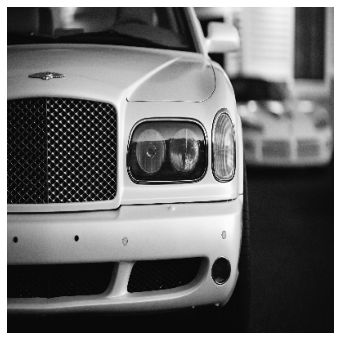

In [5]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

image_path = '../../../datasets/Computer_Vision/input/computer-vision-resources/car_illus.jpg'
image = tf.io.read_file(image_path)
image = tf.io.decode_jpeg(image, channels=1)
image = tf.image.resize(image, size=[400, 400])

plt.figure(figsize=(6, 6))
plt.imshow(tf.squeeze(image), cmap='gray')
plt.axis('off')
plt.show()

In [18]:
import learntools.computer_vision.visiontools as visiontools

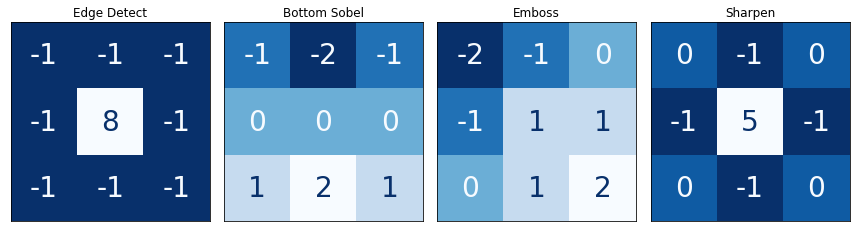

In [7]:
from learntools.computer_vision.visiontools import edge, bottom_sobel, emboss, sharpen

kernels = [edge, bottom_sobel, emboss, sharpen]
names = ['Edge Detect', 'Bottom Sobel', 'Emboss', 'Sharpen']

plt.figure(figsize=(12, 12))
for i, (kernel, name) in enumerate(zip(kernels, names)):
    plt.subplot(1, 4, i+1)
    visiontools.show_kernel(kernel)
    plt.title(name)

plt.tight_layout()

In [8]:
kernel = tf.constant([
    [-2, -1, 0],
    [-1, 1, 1],
    [0, 1, 2]
])

In [9]:
image = tf.image.convert_image_dtype(image, dtype=tf.float32)
image = tf.expand_dims(image, axis=0)
kernel = tf.reshape(kernel, [*kernel.shape, 1, 1])
kernel = tf.cast(kernel, dtype=tf.float32)

In [10]:
conv_fn = tf.nn.conv2d

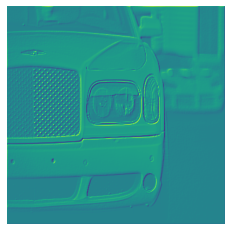

In [13]:
image_filter = conv_fn(
    input=image,
    filters=kernel,
    strides=1,
    padding='SAME'
)
plt.imshow(
    tf.squeeze(image_filter)
)
plt.axis('off')
plt.show()

In [14]:
relu_fn = tf.nn.relu

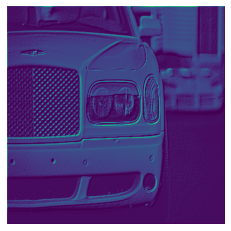

In [15]:
image_detect = relu_fn(image_filter)

plt.imshow(
    tf.squeeze(image_detect)
)
plt.axis('off')
plt.show()

In [16]:
import sympy
sympy.init_printing()
from IPython.display import display

image = np.array([
    [0, 1, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0],
    [0, 1, 0, 1, 1, 1],
    [0, 1, 0, 0, 0, 0],
])

kernel = np.array([
    [1, -1],
    [1, -1],
])

display(sympy.Matrix(image))
display(sympy.Matrix(kernel))

image = tf.cast(image, dtype=tf.float32)
image = tf.reshape(image, [1, *image.shape, 1])
kernel = tf.reshape(kernel, [*kernel.shape, 1, 1])
kernel = tf.cast(kernel, dtype=tf.float32)

⎡0  1  0  0  0  0⎤
⎢                ⎥
⎢0  1  0  0  0  0⎥
⎢                ⎥
⎢0  1  0  0  0  0⎥
⎢                ⎥
⎢0  1  0  0  0  0⎥
⎢                ⎥
⎢0  1  0  1  1  1⎥
⎢                ⎥
⎣0  1  0  0  0  0⎦

⎡1  -1⎤
⎢     ⎥
⎣1  -1⎦

In [17]:
image_filter = tf.nn.conv2d(
    input=image,
    filters=kernel,
    strides=1,
    padding='VALID',
)
image_detect = tf.nn.relu(image_filter)

display(sympy.Matrix(tf.squeeze(image_filter).numpy()))
display(sympy.Matrix(tf.squeeze(image_detect).numpy()))

⎡-2.0  2.0  0.0   0.0  0.0⎤
⎢                         ⎥
⎢-2.0  2.0  0.0   0.0  0.0⎥
⎢                         ⎥
⎢-2.0  2.0  0.0   0.0  0.0⎥
⎢                         ⎥
⎢-2.0  2.0  -1.0  0.0  0.0⎥
⎢                         ⎥
⎣-2.0  2.0  -1.0  0.0  0.0⎦

⎡0.0  2.0  0.0  0.0  0.0⎤
⎢                       ⎥
⎢0.0  2.0  0.0  0.0  0.0⎥
⎢                       ⎥
⎢0.0  2.0  0.0  0.0  0.0⎥
⎢                       ⎥
⎢0.0  2.0  0.0  0.0  0.0⎥
⎢                       ⎥
⎣0.0  2.0  0.0  0.0  0.0⎦